In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/startup_funding.csv")
display(df.head())

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [40]:
df =df.drop('Remarks',axis=1)


In [43]:
for col in ['Industry Vertical','SubVertical','City  Location','Investors Name','InvestmentnType']:
  df[col].fillna('Unknown', inplace=True)

/tmp/ipython-input-1929412681.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [44]:
df['Amount in USD'] =df['Amount in USD'].astype(str).str.replace(',','', regex=False).str.replace('+', '', regex=False)
df['Amount in USD'] =pd.to_numeric(df['Amount in USD'], errors='coerce')
df['Amount in USD'].fillna(0, inplace=True)


/tmp/ipython-input-2114032962.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount in USD'].fillna(0, inplace=True)


In [45]:
df['Date dd/mm/yyyy']=pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')


In [48]:
for col in['Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location','Investors Name','InvestmentnType']:
  df[col] = df[col].astype(str).str.strip().str.replace('\\\xc2\\\xa0', '', regex=True)
  df[col] = df[col].apply(lambda x: ' '.join(x.split()))
  df[col] = df[col].str.lower()


In [49]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1292 entries, 0 to 3008
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              1292 non-null   int64         
 1   Date dd/mm/yyyy    1292 non-null   datetime64[ns]
 2   Startup Name       1292 non-null   object        
 3   Industry Vertical  1292 non-null   object        
 4   SubVertical        1292 non-null   object        
 5   City  Location     1292 non-null   object        
 6   Investors Name     1292 non-null   object        
 7   InvestmentnType    1292 non-null   object        
 8   Amount in USD      1292 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 100.9+ KB


None

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,2020-09-01,byju’s,none,none,bengaluru,tiger global management,private equity round,200000000.0
2,3,2020-09-01,mamaearth,none,none,bengaluru,sequoia capital india,series b,18358860.0
3,4,2020-02-01,https://www.wealthbucket.in/,none,none,new delhi,vinod khatumal,pre-series a,3000000.0
4,5,2020-02-01,fashor,none,none,mumbai,sprout venture partners,seed round,1800000.0
6,7,2020-10-01,zomato,none,none,gurgaon,ant financial,private equity round,150000000.0


Subtask

Analyze funding trends over time


In [50]:
df['FundingYear'] = df['Date dd/mm/yyyy'].dt.year
df['FundingYear'] = df['Date dd/mm/yyyy'].dt.month


yearly_funding_trends = df.groupby('FundingYear').agg(
    total_funding_usd=('Amount in USD', 'sum'),
    number_of_deals=('Sr No', 'count')
).reset_index()

display(yearly_funding_trends)

,FundingYear,total_funding_usd,number_of_deals
0,1,2.113790e+09,104
1,2,1.029800e+09,93
2,3,1.307332e+09,109
3,4,1.270789e+09,116
4,5,6.428860e+08,108
5,6,1.000021e+09,110
6,7,1.218981e+09,112
7,8,1.360449e+09,115
8,9,5.329520e+08,108
9,10,7.873522e+08,109


In [51]:
sector_funding = df.groupby('Industry Vertical')['Amount in USD'].sum().reset_index()
sector_funding = sector_funding.sort_values(by='Amount in USD', ascending=False)
print("Top 10 Sectors by Funding:")
display(sector_funding.head(10))


Top 10 Sectors by Funding:


,Industry Vertical,Amount in USD
0,none,1.534608e+10


In [52]:
city_funding = df.groupby('City  Location',)['Amount in USD'].sum().reset_index()
city_funding = sector_funding.sort_values(by='Amount in USD', ascending=False)
print("\nTop 10 cities by funding:")
display(city_funding.head(10))



Top 10 cities by funding:


,Industry Vertical,Amount in USD
0,none,1.534608e+10


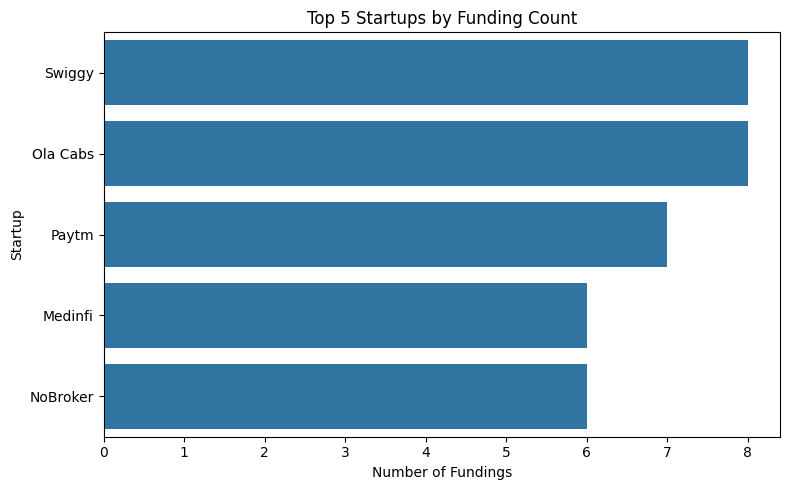

In [55]:
if 'Startup Name' in df.columns: # Changed 'startup_name' to 'Startup Name' based on df.columns output and fixed indentation
            plt.figure(figsize=(8, 5))
            top_startups = df['Startup Name'].value_counts().head(5) # Changed 'startup_name' to 'Startup Name'
            sns.barplot(x=top_startups.values, y=top_startups.index)
            plt.title("Top 5 Startups by Funding Count")
            plt.xlabel("Number of Fundings")
            plt.ylabel("Startup")
            plt.tight_layout()
            plt.show(block=False)
            plt.pause(0.1)

In [57]:
# Active investors
if 'investors_name' in df.columns:
  active_investors = df['investors_name'].value_counts().head(5)
  text.insert(tk.END, "\nTop 5 Active Investors:\n")
  text.insert(tk.END, f"{active_investors}\n")


In [60]:
# Active investors
if 'Investors Name' in df.columns:
  active_investors = df['Investors Name'].value_counts().head(5)
  print("\nTop 5 Active Investors:\n")
  print(f"{active_investors}\n")

# Investment type distributions
if 'InvestmentnType' in df.columns:
  inv_type_dist = df['InvestmentnType'].value_counts()
  print("\nInvestment Type Distribution:\n")
  print(f"{inv_type_dist}\n")
  print("\n Analysis Completed!\n")


Top 5 Active Investors:

Investors Name
Undisclosed Investors    39
Undisclosed investors    30
Ratan Tata               25
Indian Angel Network     23
Kalaari Capital          16
Name: count, dtype: int64


Investment Type Distribution:

InvestmentnType
Private Equity                 1356
Seed Funding                   1355
Seed/ Angel Funding              60
Seed / Angel Funding             47
Seed\\nFunding                   30
Debt Funding                     25
Series A                         24
Seed/Angel Funding               23
Series B                         20
Series C                         14
Series D                         12
Angel / Seed Funding              8
Seed Round                        7
Seed                              4
Private Equity Round              4
Pre-Series A                      4
Seed / Angle Funding              3
Equity                            2
Series E                          2
Corporate Round                   2
Venture Round           

In [69]:
# Investment type distributions
# This analysis has already been performed in cell iXdzzvsxXyHO
# if 'investment_type' in df.columns:
#   inv_type_dist = df['investment_type'].value_counts()
#   text.insert(tk.END, "\nInvestment Type Distribution:\n")
#   text.insert(tk.END, f"{inv_type_dist}\n")
#   text.insert(tk.END, "\n Analysis Completed!\n")
# except Exception as e:
#   messagebox.showerror("Error", f"Analysis failed: {str(e)}")
# def showinsights():
#     global df
#     if df is None:
#         messagebox.showerror("Error", "Please upload and clean dataset first")
#         return
if 'InvestmentnType' in df.columns:
    inv_type_dist = df['InvestmentnType'].value_counts()
    print("\nInvestment Type Distribution:")
    print(inv_type_dist)


Investment Type Distribution:
InvestmentnType
Private Equity                 1356
Seed Funding                   1355
Seed/ Angel Funding              60
Seed / Angel Funding             47
Seed\\nFunding                   30
Debt Funding                     25
Series A                         24
Seed/Angel Funding               23
Series B                         20
Series C                         14
Series D                         12
Angel / Seed Funding              8
Seed Round                        7
Seed                              4
Private Equity Round              4
Pre-Series A                      4
Seed / Angle Funding              3
Equity                            2
Series E                          2
Corporate Round                   2
Venture Round                     2
Series F                          2
pre-Series A                      2
Seed Funding Round                1
Single Venture                    1
Maiden Round                      1
pre-series A     

/tmp/ipython-input-3026228171.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount in USD'].fillna(0, inplace=True)


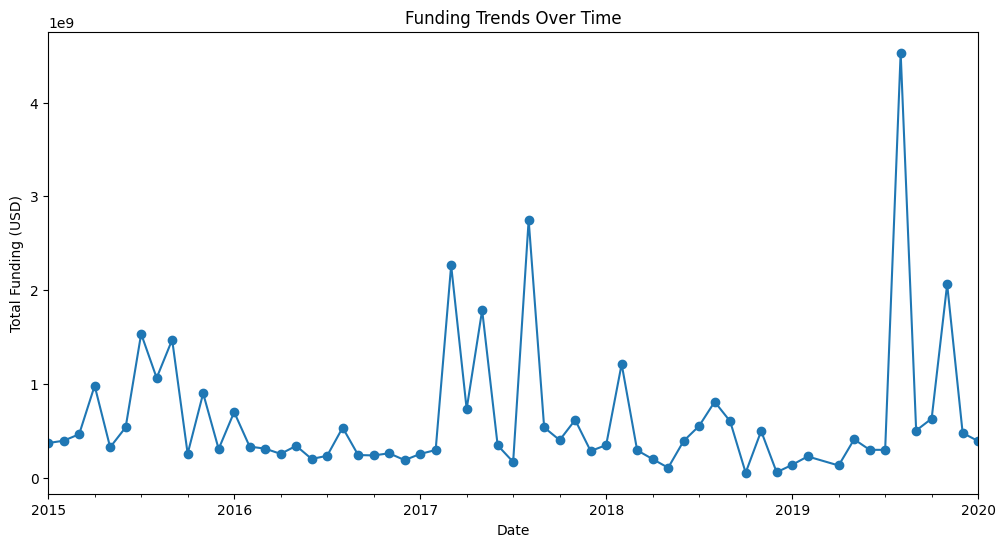

In [74]:
df['Date dd/mm/yyyy']=pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')
df['Amount in USD'] =df['Amount in USD'].astype(str).str.replace(',','', regex=False).str.replace('+', '', regex=False)
df['Amount in USD'] =pd.to_numeric(df['Amount in USD'], errors='coerce')
df['Amount in USD'].fillna(0, inplace=True)
funding_trend = df.groupby(df['Date dd/mm/yyyy'].dt.to_period('M'))['Amount in USD'].sum()
funding_trend.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Funding Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Funding (USD)")
plt.show()